In [1]:
#| hide
# skip
! [ -e /content ] && pip install -Uqq model_inspector nbdev
# For colab. Restart the runtime after running this cell!

In [2]:
#| default_exp inspect.tree

# Decision Tree

> Inspector functionality specific to tree models

In [3]:
#| export
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from model_inspector.delegate import delegates
from model_inspector.inspect.any_model import _Inspector
from model_inspector.inspect.classifier import _BinInspector, _MultiInspector
from model_inspector.inspect.regressor import _RegInspector
from sklearn.tree import plot_tree

In [4]:
#| export
class _TreeInspector(_Inspector):
    """Decision tree model inspector"""

    @delegates(plot_tree)
    def plot_tree(self, ax: Optional[Axes] = None, **kwargs):
        """Show decision tree.

        """
        if ax is None:
            # these dimensions seem to work well empirically
            max_size = 50
            depth = (
                kwargs["max_depth"] + 1
                if "max_depth" in kwargs
                else self.model.get_depth()
            )
            fig_height = min(depth * 2.2, max_size)
            width = (
                2 * kwargs["max_depth"]
                if "max_depth" in kwargs
                else self.model.get_n_leaves()
            )
            fig_width = min(width * 3.5, max_size)
            _, ax = plt.subplots(figsize=(fig_width, fig_height))
        kwargs = {"filled": True, "fontsize": 12, **kwargs}
        return plot_tree(
            self.model,
            feature_names=self.X.columns,
            class_names=np.unique(self.y).astype(str),
            ax=ax,
            **kwargs,
        )[0].axes

In [5]:
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from model_inspector import get_inspector

In [11]:
show_doc(_TreeInspector.plot_tree)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/tree.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### plot_tree (regression model)

>      plot_tree (regression model)
>                 (ax:Optional[matplotlib.axes._axes.Axes]=None, max_depth=None,
>                 feature_names=None, class_names=None, label='all',
>                 filled=False, impurity=True, node_ids=False, proportion=False,
>                 rounded=False, precision=3, fontsize=None)

Show decision tree.

Remaining parameters are passed to `sklearn.tree._export.plot_tree`.

## Regression Example

In [6]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [7]:
inspector = get_inspector(DecisionTreeRegressor(max_depth=3).fit(X, y), X, y)

In [8]:
#| hide
from model_inspector.inspect.tree import _TreeInspector

In [9]:
#| hide
assert isinstance(inspector, _TreeInspector)

In [10]:
#| hide
from nbdev.showdoc import *

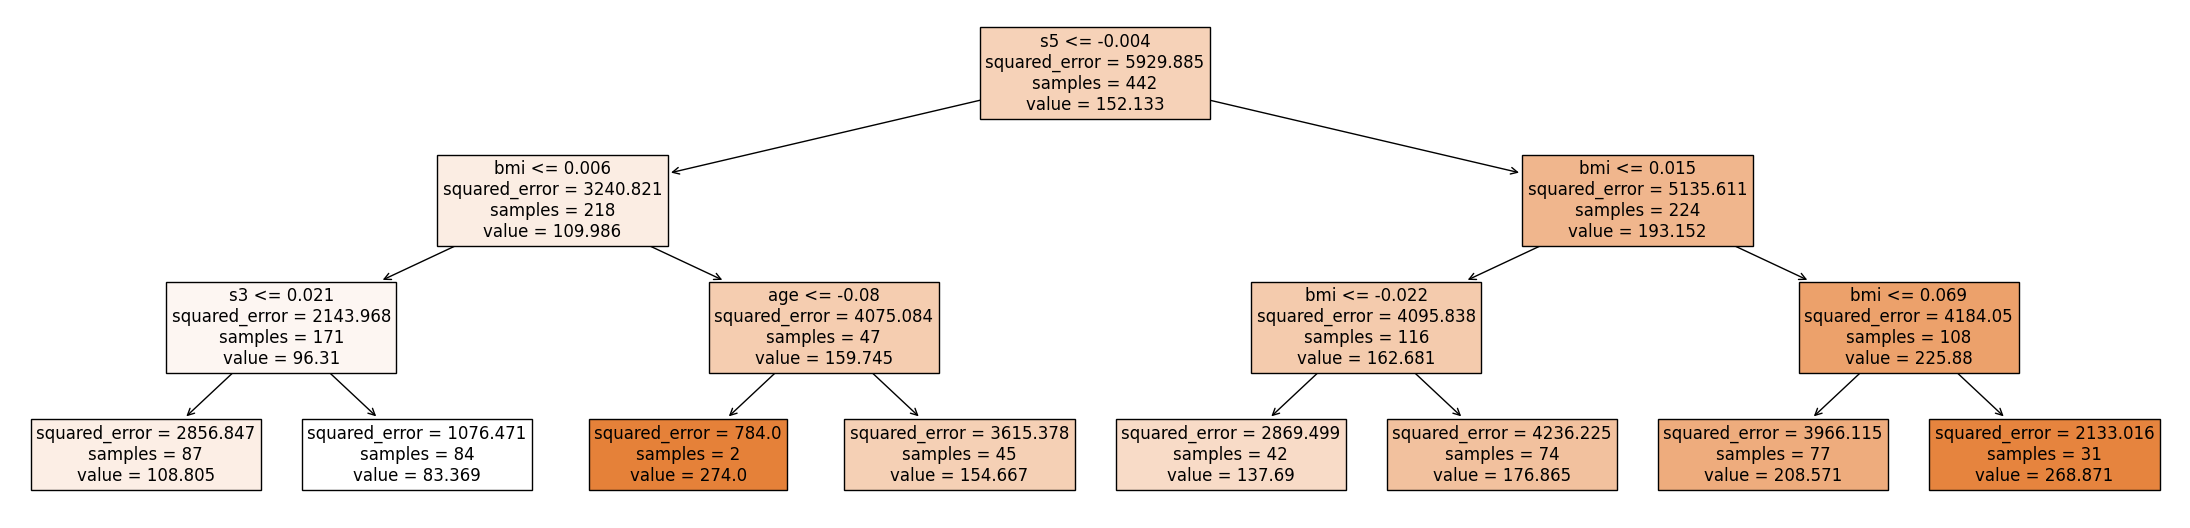

In [12]:
ax = inspector.plot_tree()

## Binary Classification Example

In [14]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [14]:
inspector = get_inspector(DecisionTreeClassifier(max_depth=3).fit(X, y), X, y)

In [15]:
#| hide
assert isinstance(inspector, _TreeInspector)

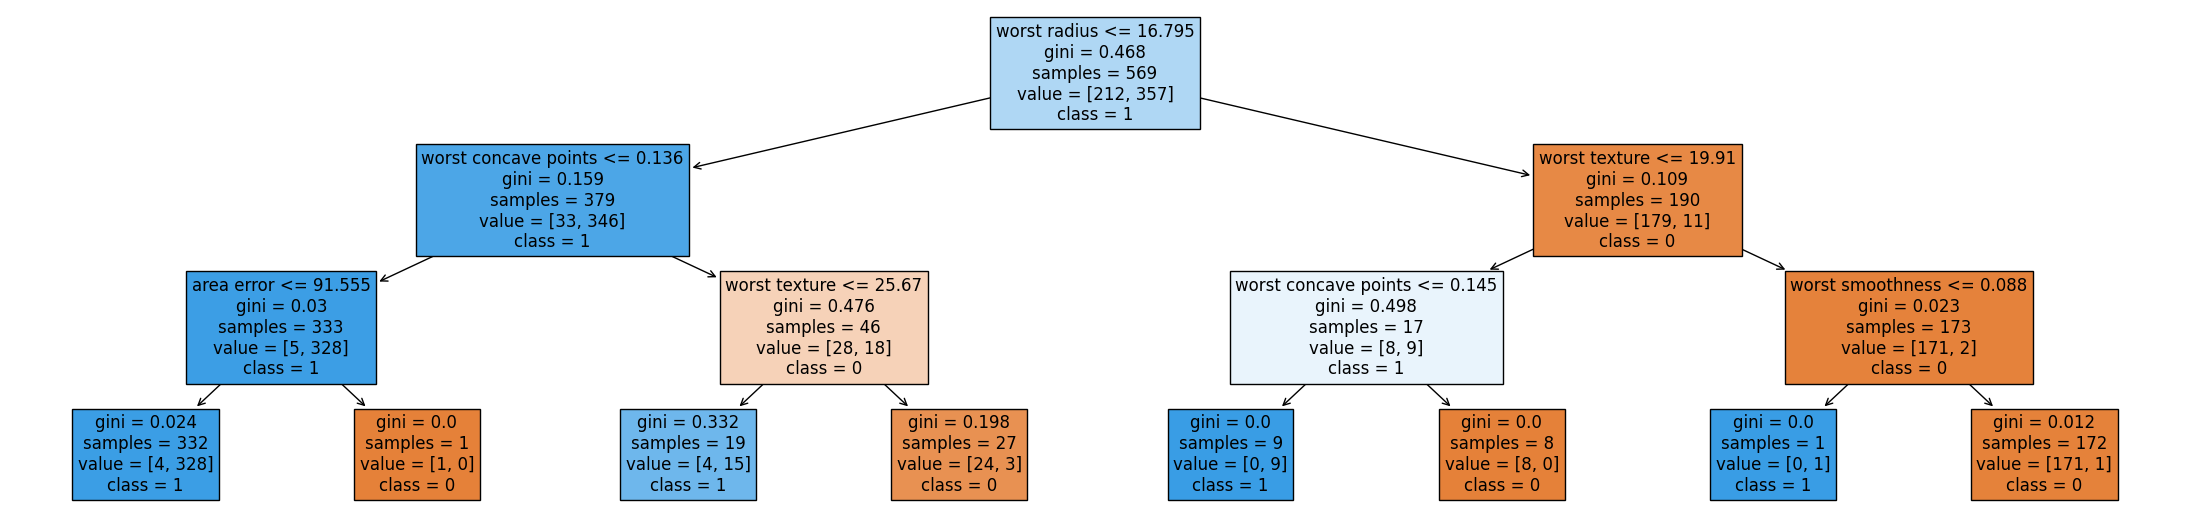

In [17]:
ax = inspector.plot_tree()

## Multiclass Example

In [18]:
X, y = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)

In [19]:
inspector = get_inspector(DecisionTreeClassifier(max_depth=3).fit(X, y), X, y)

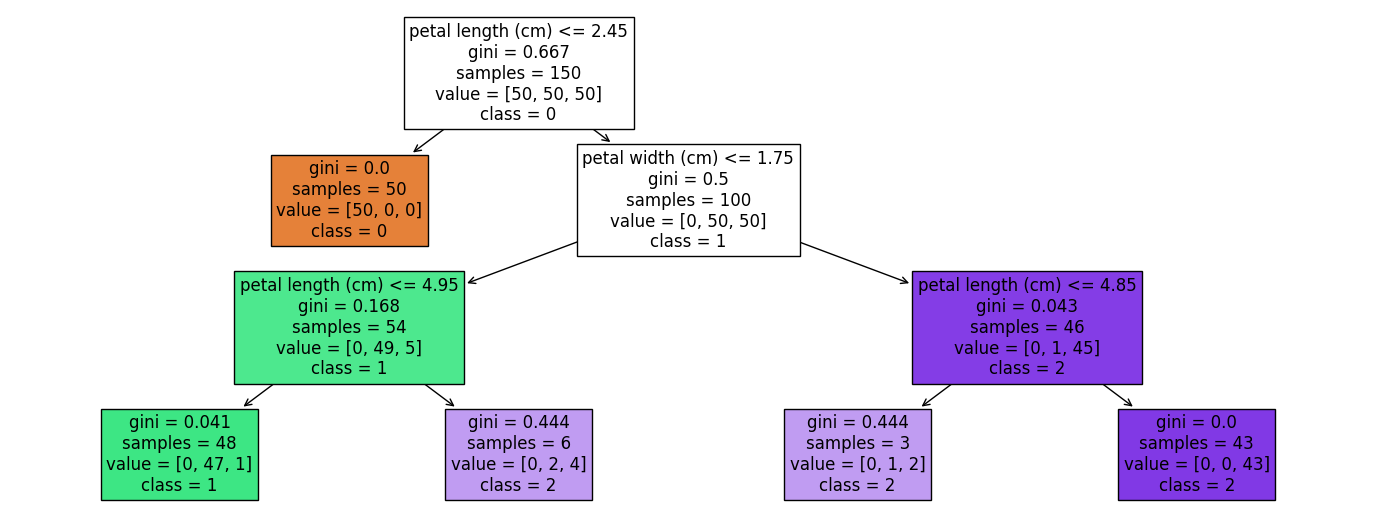

In [20]:
ax = inspector.plot_tree()

In [21]:
#| export
_all_ = ["_TreeInspector"]